# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]
- image: images/BTC_price.png

In [116]:
#hide
%load_ext autoreload
%autoreload 2
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
#hide
df_all = read_api()
df_all.index.name = 'date'
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
#df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
df_covid = df_covid[['ETH', 'BTC', 'XAU']]

/Users/Dom/Documents/Bachelor/corr-app/_notebooks/scripts/read_data.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['currency'] = df_final.apply(lambda row: fsym, axis=1)


In [134]:
#hide_input
market = read_news('market')
covid = read_covid()

/Users/Dom/Documents/Bachelor/corr-app/_notebooks/scripts/read_data.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['category'] = df_final.apply(lambda row: category, axis=1)


### Šios dienos kriptovaliutų ir pandemijos naujienos

In [135]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Chainlink price prediction: price to retest $10.0 support level..  TL;DR Breakdown Chainlink price currently at $12.14731. Price action bearish on both short and mid-term chart. LINK price expected to decline further before finding support. Chainlink price prediction: Today’s price overview Chainlink price opened at $12.608 with slight bearish momentum that dominated the markets throughout the day. The buyers failed to muster any real momentum […] ... [| Skaityti daugiau](https://www.cryptopolitan.com/chainlink-price-retest-10-0-support-level/) 

In [136]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Moderna: Covid vaccine shows nearly 95% protection.  The results add to growing confidence that vaccination can end the pandemic. ... [| Skaityti daugiau](https://www.bbc.co.uk/news/health-54902908) 

### Kainų kaita pandemijos metu

<AxesSubplot:xlabel='date'>

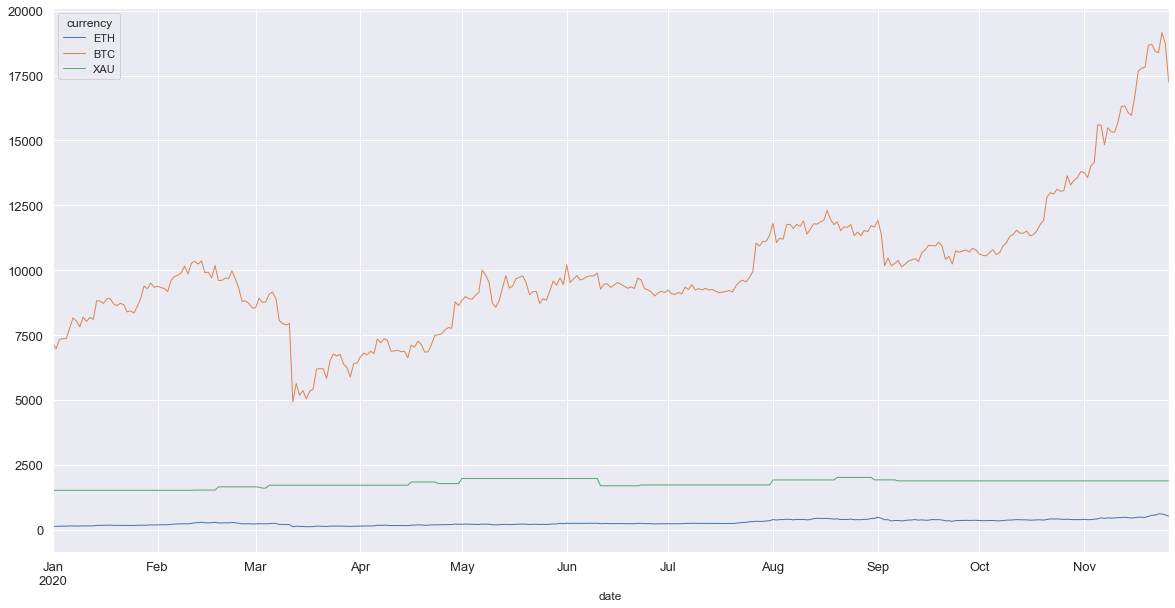

In [3]:
#hide_input
df_covid.plot(figsize=(20,10), linewidth=1, fontsize=13)
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()

currency,ETH,BTC,XAU
currency,,,
ETH,1.000000,0.908092,0.565587
BTC,0.908092,1.000000,0.451230
XAU,0.565587,0.451230,1.000000


Koreliacijos matrica.

<AxesSubplot:xlabel='currency', ylabel='currency'>

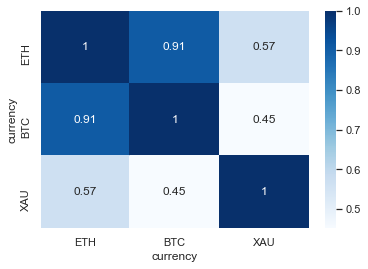

In [8]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues")
# plt.savefig('covid.eps', format='eps')